In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav
from scipy.interpolate import interp1d
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from matplotlib import gridspec

import sys
sys.path.append("../")
from create_spec import create_spec
from fit2gauss import fit2gauss

In [7]:
# import arrays
tube = readsav('/Users/WilliamHenryAshfieldIV/dat/ebtel_l85_sub.sav',verbose=False,python_dict=False)
frac = readsav('/Users/WilliamHenryAshfieldIV/dat/ebtel_l85_si_iv_nei.sav',verbose=False,python_dict=False)
log10T,log10G = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/goft_1403.dat.txt',comments='%',unpack=True)

(1401.75, 1404)

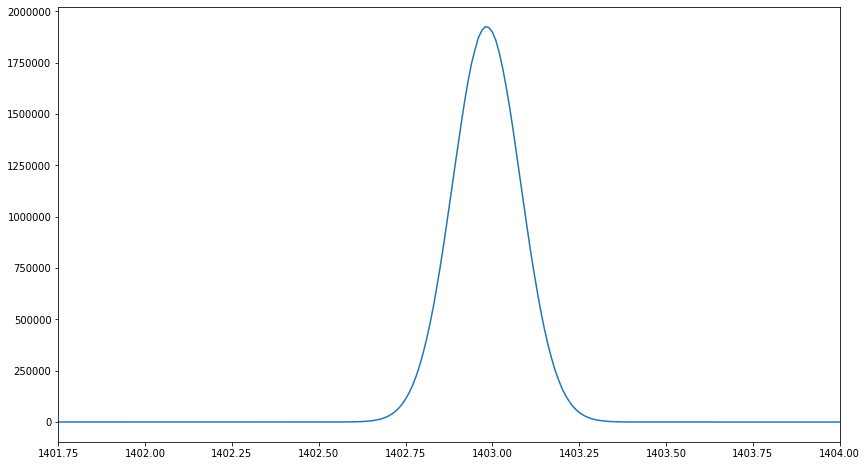

In [8]:
wav,spec,error = create_spec(tube,frac,log10T,log10G,time=50) #350 -> single
fig = plt.figure(figsize=(14,8))
plt.plot(wav, spec)
plt.xlim(1401.75,1404)

est params =  [152796.1199585353, 1403.3167584479422, 0.1, 1772905.1334265743, 1402.954922276071, 0.1]
single peak found
only one peak still
new init params =  [152796.1199585353, 1403.3167584479422, 0.1, 1772905.1334265743, 1402.954922276071, 0.1]
a2g = [ 4.81310280e-06  1.40405091e+03 -1.04222187e-01  1.92577524e+06
  1.40298363e+03  9.77917445e-02]
a1g[0] = 1925775.2384929874
chi2g =  0.11375138080632659
a2g =  [1.92577524e+06 1.40298363e+03 9.77917445e-02 0.00000000e+00
 1.40298363e+03 9.77917445e-02]
chi1g =  0.11358049737980602
chi2g =  -1.0


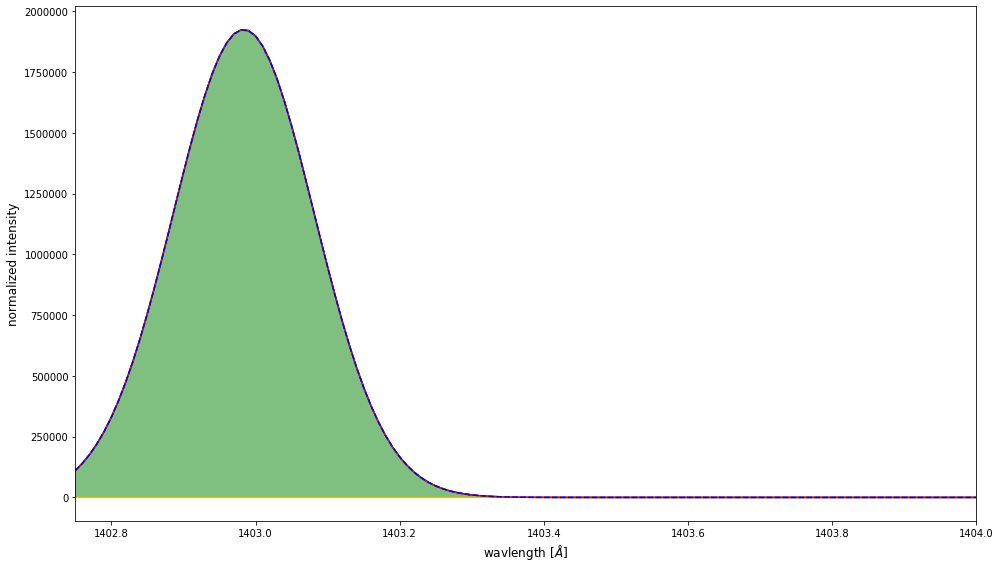

In [42]:
res = fit2gauss(wav,spec,error,verbose=True)

# extract arrays
y2a = res["y2a"]
y2b = res["y2b"]
y1g = res["y1g"]

#plot 
fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

# spectra
ax1.plot(wav, spec)

# peak 1
ax1.plot(wav, y2a, "g")
ax1.fill_between(wav, y2a.min(), y2a, facecolor="green", alpha=0.5)
  
# peak 2
ax1.plot(wav, y2b, "y")
ax1.fill_between(wav, y2b.min(), y2b, facecolor="yellow", alpha=0.5) 

#both
ax1.plot(wav,y2a+y2b, "r")

# single fit
ax1.plot(wav,y1g,'b--')
    
plt.xlim(1402.75,1404)
ax1.set_xlabel("wavlength [$\AA$]",  fontsize=12)
ax1.set_ylabel("normalized intensity",  fontsize=12)
fig.tight_layout()

In [43]:
a1g = res["a1g"]
a2g = res["a2g"]

line = 1402.77
l1 = a2g[1]
l2 = a2g[4]
v1 = (l1-line)/line*3e5
v2 = (l2-line)/line*3e5


print('red velocity = ',v1,'-----', '"blue" velocity = ', v2)

red velocity =  45.6864321595321 ----- "blue" velocity =  45.6864321595321


In [44]:
# single Gaussian
line = 1402.77
l1 = a1g[1]
v1 = (l1-line)/line*3e5
print('red velocity = ',v1)

red velocity =  45.6864321595321


In [45]:
sig = a2g[2]
c = 300
line = 1402.77
freq = c/line*1e3
v_width = sig*freq
print('line width = ', v_width)

line width =  20.913993998796403
